# Data Preparation

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [4]:
# Loading the Dataset
df = pd.read_csv(r'../data/poc_sleep_synthetic_dataset.csv')

In [6]:
df.shape

(10000, 11)

In [7]:
df.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Sleep Disorder
0,195,Female,51,6.0,6,90,8,Overweight,140/95,75,Sleep Apnea
1,50,Male,35,7.1,8,60,4,Normal,125/80,65,NaN
2,57,Male,31,7.7,7,75,6,Normal,120/80,70,NaN
3,131,Male,44,7.8,8,40,5,Normal,130/85,68,NaN
4,366,Female,52,6.1,6,55,7,Overweight,140/95,72,Sleep Apnea


### EDA

In [8]:
# Shape
df.shape

(10000, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                10000 non-null  int64  
 1   Gender                   10000 non-null  object 
 2   Age                      10000 non-null  int64  
 3   Sleep Duration           10000 non-null  float64
 4   Quality of Sleep         10000 non-null  int64  
 5   Physical Activity Level  10000 non-null  int64  
 6   Stress Level             10000 non-null  int64  
 7   BMI Category             10000 non-null  object 
 8   Blood Pressure           10000 non-null  object 
 9   Heart Rate               10000 non-null  int64  
 10  Sleep Disorder           3864 non-null   object 
dtypes: float64(1), int64(6), object(4)
memory usage: 859.5+ KB


In [12]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,193.226200,42.692500,7.193010,7.428700,59.729200,5.303700,69.500300
std,105.830555,8.818816,0.786711,1.103557,20.606769,1.766346,3.197221
min,6.000000,28.000000,5.900000,5.000000,30.000000,3.000000,65.000000
25%,101.000000,35.000000,6.500000,6.000000,45.000000,4.000000,68.000000
50%,194.000000,43.000000,7.200000,8.000000,60.000000,5.000000,70.000000
75%,286.000000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000
max,369.000000,59.000000,8.500000,9.000000,90.000000,8.000000,80.000000


In [17]:
# Numerical and Categorical features

categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = df.select_dtypes(exclude=['object']).columns.tolist()
categorical_cols, numerical_cols


(['Gender', 'BMI Category', 'Blood Pressure', 'Sleep Disorder'],
 ['Person ID',
  'Age',
  'Sleep Duration',
  'Quality of Sleep',
  'Physical Activity Level',
  'Stress Level',
  'Heart Rate'])

In [27]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [29]:
#Unique values in Categorical data
for col in categorical_cols:
    if col == 'Person ID':
        continue
    print(f"{col}: {df[col].unique()}")

Gender: ['Female' 'Male']
BMI Category: ['Overweight' 'Normal' 'Normal Weight']
Blood Pressure: ['140/95' '125/80' '120/80' '130/85' '115/75' '135/90' '_RARE_']
Sleep Disorder: ['Sleep Apnea' nan 'Insomnia']


In [33]:
#Describe the Numerical values
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,193.226200,42.692500,7.193010,7.428700,59.729200,5.303700,69.500300
std,105.830555,8.818816,0.786711,1.103557,20.606769,1.766346,3.197221
min,6.000000,28.000000,5.900000,5.000000,30.000000,3.000000,65.000000
25%,101.000000,35.000000,6.500000,6.000000,45.000000,4.000000,68.000000
50%,194.000000,43.000000,7.200000,8.000000,60.000000,5.000000,70.000000
75%,286.000000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000
max,369.000000,59.000000,8.500000,9.000000,90.000000,8.000000,80.000000


In [34]:
# Deleting the Person ID Column

df = df.drop(columns=['Person ID'])

#### AGE

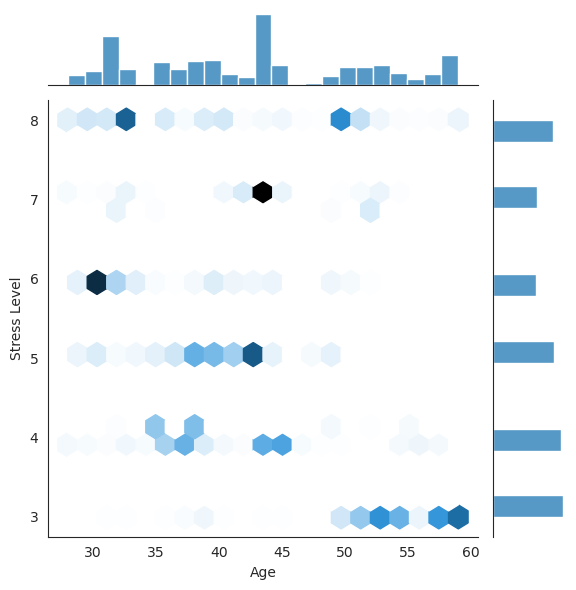

In [46]:
with sns.axes_style('white'):
    sns.jointplot(x="Age", y="Stress Level", data=df, kind='hex')

In [51]:
df.columns

Index(['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Sleep Disorder'],
      dtype='object')

##### Finding unique values in all columns

In [67]:
for col in df.columns:
    print(f"{col} :  {df[col].unique()}", end='\n\n')

Gender :  ['Female' 'Male']

Age :  [51 35 31 44 52 28 43 48 57 38 40 59 32 45 41 49 50 53 37 58 39 56 36 55
 30 42 33 54 46 34 29 47]

Sleep Duration :  [6.  7.1 7.7 7.8 6.1 7.5 7.2 8.  8.1 7.6 8.5 6.9 6.5 6.6 7.  6.8 6.3 6.4
 7.3 8.2 7.9 6.2 6.7 7.4 8.4 8.3 5.9]

Quality of Sleep :  [6 8 7 9 5]

Physical Activity Level :  [90 60 75 40 55 45 30 70 50 85 35 80 57]

Stress Level :  [8 4 6 5 7 3]

BMI Category :  ['Overweight' 'Normal' 'Normal Weight']

Blood Pressure :  ['140/95' '125/80' '120/80' '130/85' '115/75' '135/90']

Heart Rate :  [75 65 70 68 72 78 77 76 73 79 67 69 80]

Sleep Disorder :  ['Sleep Apnea' 'Normal' 'Insomnia']



In [58]:
df['Sleep Disorder'].fillna('Normal', inplace=True)

In [66]:
df.drop(df[df['Blood Pressure'] == '_RARE_'].index, inplace=True)


#### AGE vs Insomnia

<Axes: xlabel='Age', ylabel='Sleep Disorder'>

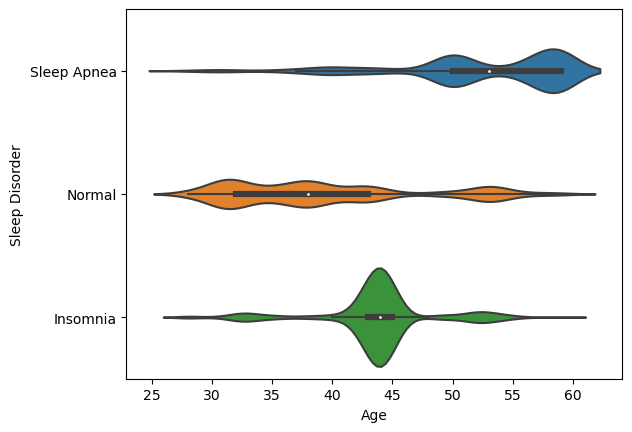

In [61]:
sns.violinplot(x=df['Age'], y=df['Sleep Disorder'])

<Axes: xlabel='Age', ylabel='Sleep Disorder'>

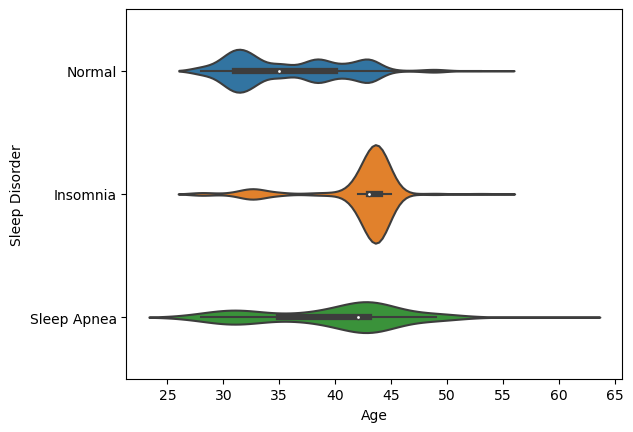

In [62]:
# Male - Sleep Disorder based on Age
sns.violinplot(x='Age', y='Sleep Disorder', data=df[df.Gender == 'Male'] )

<Axes: xlabel='Age', ylabel='Sleep Disorder'>

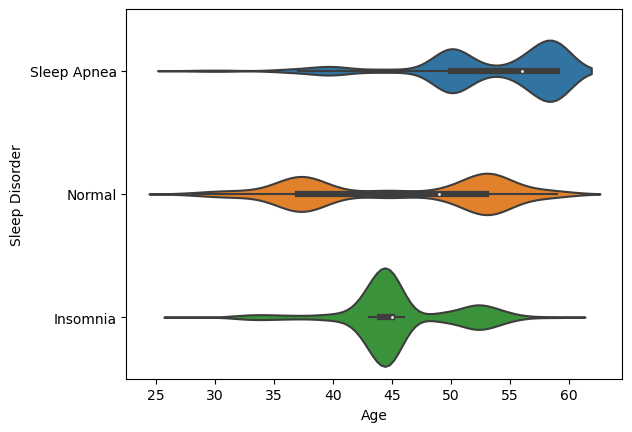

In [64]:
# Male - Sleep Disorder based on Age
sns.violinplot(x='Age', y='Sleep Disorder', data=df[df.Gender == 'Female'] ) 